### Table of Contents

* [I. Creating The Embbeding](#chapter1)
* [II. Preparing the data](#chapter2)
    * [1. Making the TF-IDF embedding](#section_2_1)
* [III. Machine Learning Classification Models](#chapter3)
    * [1. Naive Bayes](#section_3_1)
    * [2. Logistic Regression](#section_3_2)
    * [3. Random Forest](#section_3_3)
    * [4. SVM](#section_3_4)
* [IV. Making the predictions for Submission](#chapter4)

In [9]:
import sys

sys.path.insert(1, '/Users/douglasbouchet/M1/ML/ml_project_2_sentwiment/src')

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from evaluate import model_Evaluate
from load_utils import load_df

### I. Creating the embedding <a class="anchor" id="chapter1"></a>

In [10]:
def createTF_IDF(full=True, lemmatize=True):
    """Create the TF-IDF representation of our data. We assume that we trained the TF-IDF on 80% of the data.
    Also split the data in train and valid data, to be tested afterward.
    It is assumed that at the location of this file, there is a directory "cleanedDataframe" containing the (lemmatize) dataframe

    Args:
        full (bool, optional): if True select all the tweet present in the dataframe, else only pick 10% of them
        of only 10% of the tweets. Defaults to True.
        lemmatize (bool, optional): if True pick the lemmatize dataset. Defaults to True.

    Returns:
        [numpy.ndarray,numpy.ndarray,numpy.ndarray,numpy.ndarray, TfidfVectorizer]: train_data, train_label, valid_data, valid_label, the vectorizer that
        we will use to transform the data for submission
    """

    df = load_df(full=False, lemmatize=True)

    train_data,  valid_data,  train_label,  valid_label = train_test_split(
        df.tweet, df.positive, test_size=0.2, random_state=26105111)

    # This object will transform the tweets into their TF-IDF embedding.
    # max features = 100000 means that we will only count frequency of the most 100000 most frequents words
    # ngram_range(1,2) means that the vectorizer can also consider 2 words as one (e.g compute TF-IDF embedding of "was not" instead of "was" and "not") 
    vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
    # Next we learn the TF-IDF embedding of our training set
    vectoriser.fit(train_data)

    # we put the training and validating set to their embedded format
    train_data = vectoriser.transform(train_data)
    valid_data = vectoriser.transform(valid_data)

    return train_data, train_label, valid_data, valid_label, vectoriser

### II. Preparing the data <a class="anchor" id="chapter2"></a>

#### 1. Making the TF-IDF embedding  <a class="anchor" id="section_2_1"></a>

In [11]:
train_data, train_label, valid_data, valid_label, vectorizer = createTF_IDF(full=True,lemmatize=True)
train_data.shape , valid_data.shape , train_label.shape , valid_label.shape

((1966637, 100000), (491660, 100000), (1966637,), (491660,))

### III. Machine Learning Classification Models <a class="anchor" id="chapter3"></a>

#### 1. Bernoulli Naive Baye  <a class="anchor" id="section_3_1"></a>

              precision    recall  f1-score   support

          -1       0.88      0.67      0.76    247987
           1       0.73      0.91      0.81    243673

    accuracy                           0.79    491660
   macro avg       0.80      0.79      0.78    491660
weighted avg       0.81      0.79      0.78    491660



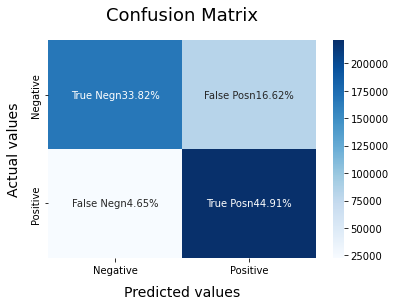

In [12]:
BNBmodel = BernoulliNB()
BNBmodel.fit( train_data,  train_label)
model_Evaluate(BNBmodel,  valid_data,  valid_label)

#### 2. Logistic Regression  <a class="anchor" id="section_3_2"></a>

/Users/douglasbouchet/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.86      0.83      0.84    247987
           1       0.83      0.86      0.85    243673

    accuracy                           0.85    491660
   macro avg       0.85      0.85      0.85    491660
weighted avg       0.85      0.85      0.85    491660



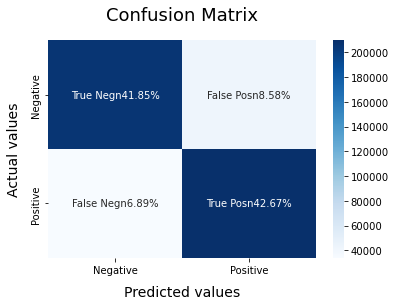

In [13]:
LogisticModel = LogisticRegression()
LogisticModel.fit( train_data,  train_label)
model_Evaluate(LogisticModel,  valid_data,  valid_label)

#### 3. RandomForest Classifier  <a class="anchor" id="section_3_3"></a>

              precision    recall  f1-score   support

          -1       0.60      0.87      0.71    247987
           1       0.77      0.42      0.54    243673

    accuracy                           0.65    491660
   macro avg       0.68      0.65      0.63    491660
weighted avg       0.68      0.65      0.63    491660



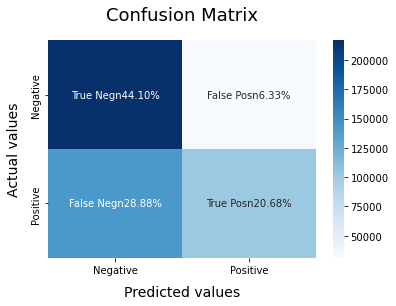

In [14]:
clf_rdf = RandomForestClassifier(max_depth=3, bootstrap=True, n_jobs=-1, min_samples_leaf=5)
clf_rdf.fit( train_data,  train_label)
model_Evaluate(clf_rdf,  valid_data,  valid_label)

#### 4. Linear SVM  <a class="anchor" id="section_3_4"></a>

For the SVM classifier, we use only the 100 000 first tweets for the training because of time expensiveness
of the SVM training process in the number of data points used to create the margins. Although, it gives quite 
good results

              precision    recall  f1-score   support

          -1       0.79      0.77      0.78    247987
           1       0.77      0.79      0.78    243673

    accuracy                           0.78    491660
   macro avg       0.78      0.78      0.78    491660
weighted avg       0.78      0.78      0.78    491660



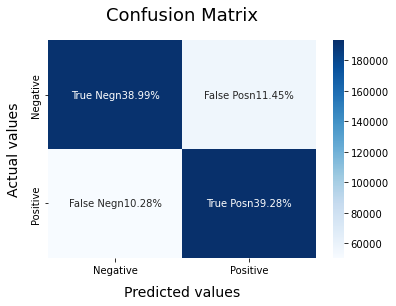

In [17]:
train_data =  train_data[0:100000]
train_label =  train_label[0:100000]
lin_clf = svm.LinearSVC()
lin_clf.fit(train_data, train_label)
model_Evaluate(lin_clf, valid_data, valid_label)

### IV. Making the predictions for Submission <a class="anchor" id="chapter4"></a>

In [30]:
data_test = pd.read_csv('../data/data_submission_preprocessed.csv')

valid_data = vectorizer.transform(data_test.tweet)

prediction = LogisticModel.predict(valid_data)
#We rename the Id column in order to be accepted in the submission platform
data_test = data_test.rename(columns={'tweet_idx':'Id'})
# We add the prections column
data_test['Prediction'] = prediction
# We save to a csv file only Id, Prediction columns
data_test[['Id', 'Prediction']].to_csv('../submission.csv', encoding='utf-8', index=False)